# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Yusuf Emir Cömert
## Student ID: 2220765023

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [30]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("data.csv")

In [32]:
z_scores = zscore(df.select_dtypes(include=[float, int]))
outliers = (abs(z_scores) > 3).any(axis=1)
df = df[~outliers]

df

c:\Users\YusufEmirComert\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NaN


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


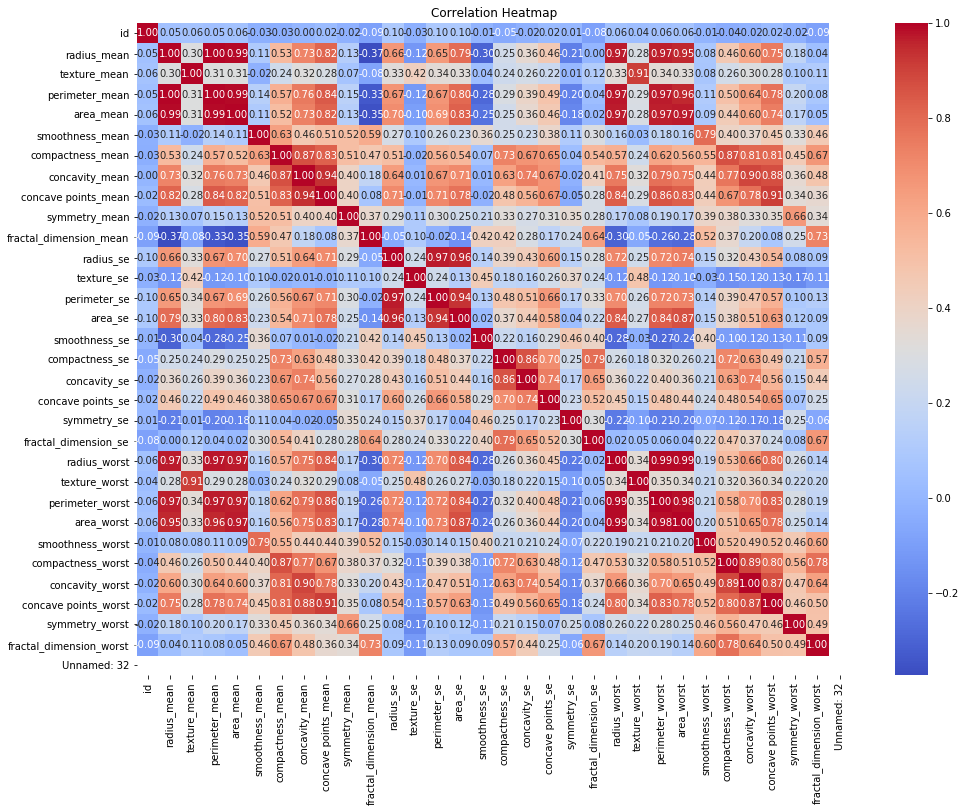

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

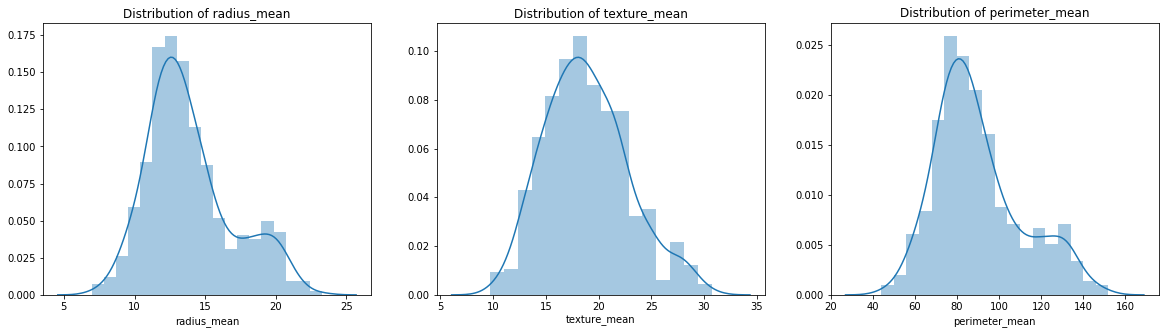

In [34]:
features_to_plot = df.columns[2:5]  # Assuming you want to visualize 'radius_mean', 'texture_mean', and 'perimeter_mean'

plt.figure(figsize=(20, 5))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.distplot(df[feature])
    plt.title(f'Distribution of {feature}')

plt.show()

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [35]:
shuffled_df = df.sample(frac=1, random_state=42)
index = int(0.7* len(df))

train_data = shuffled_df.iloc[:index]
test_data = shuffled_df.iloc[index:]

## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Hocam I got "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')." error
# so I asked chatgpt to solve it and it found out that some columns have to be dropped but Idk what is "Unnamed: 32"
columns_to_drop = ['Unnamed: 32', 'id']
train_data = train_data.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)

X_train_knn = train_data.drop('diagnosis', axis=1)
y_train_knn = train_data['diagnosis']
X_test_knn = test_data.drop('diagnosis', axis=1)
y_test_knn = test_data['diagnosis']

# Created list for itarating in loop
k_values = [3, 5, 7, 9]  # You can extend this list based on your preference
p_values = [1, 2]        # Two different values for Minkowski distance

best_accuracy = 0
best_k = None
best_p = None

for k in k_values:
    for p in p_values:
        knn_model = KNeighborsClassifier(n_neighbors=k, p=p)
        knn_model.fit(X_train_knn, y_train_knn)

        y_pred_knn = knn_model.predict(X_test_knn)

        accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)

        if accuracy_knn > best_accuracy:
            best_accuracy = accuracy_knn
            best_k = k
            best_p = p

# Print the best parameters and accuracy
print("\nBest Parameters:")
print("Best k: ",best_k)
print("Best p: ", best_p)
print("Best Accuracy: ", best_accuracy)

#If you try to run this code more than once, it gives "['Unnamed: 32' 'id'] not found in axis" error because of removing columns.



Best Parameters:
Best k:  5
Best p:  2
Best Accuracy:  0.959731543624161


### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train_data.drop('diagnosis', axis=1)
y_train = train_data['diagnosis']
X_test = test_data.drop('diagnosis', axis=1)
y_test = test_data['diagnosis']

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)


accuracy_LR = accuracy_score(y_test, y_pred)


c:\Users\YusufEmirComert\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

In [38]:
accuracy_LR = accuracy_score(y_test, y_pred)
conf_matrix_LR = confusion_matrix(y_test, y_pred)
classification_report_LR = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_LR)
print("\nConfusion Matrix of Linear Regression:")
print(conf_matrix_LR)
print("\nClassification Report of Linear Regression:")
print(classification_report_LR)

Accuracy: 0.959731543624161

Confusion Matrix of Linear Regression:
[[101   1]
 [  5  42]]

Classification Report of Linear Regression:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97       102
           M       0.98      0.89      0.93        47

    accuracy                           0.96       149
   macro avg       0.96      0.94      0.95       149
weighted avg       0.96      0.96      0.96       149



In [39]:

accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)
classification_report_knn = classification_report(y_test_knn, y_pred_knn)
print("Accuracy:", accuracy_knn)
print("\nConfusion Matrix of KNN:")
print(conf_matrix_knn)
print("\nClassification Report of KNN:")
print(classification_report_knn)

Accuracy: 0.9530201342281879

Confusion Matrix of KNN:
[[100   2]
 [  5  42]]

Classification Report of KNN:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       102
           M       0.95      0.89      0.92        47

    accuracy                           0.95       149
   macro avg       0.95      0.94      0.94       149
weighted avg       0.95      0.95      0.95       149



### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

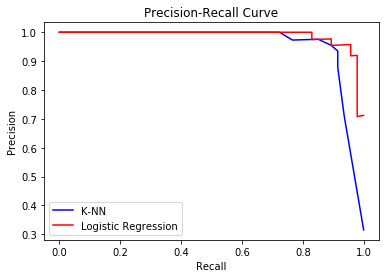

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test_knn, knn_model.predict_proba(X_test_knn)[:, 1], pos_label='M')
plt.plot(recall_knn, precision_knn, label='K-NN', color='blue')

# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1], pos_label='M')
plt.plot(recall_lr, precision_lr, label='Logistic Regression', color='red')

# Plotting
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

In [41]:
from sklearn.metrics import roc_auc_score

# KNN
auc_roc_knn = roc_auc_score(y_test_knn, knn_model.predict_proba(X_test_knn)[:, 1])
print("AUC-ROC for K-NN:", auc_roc_knn)

# Logistic Regression
auc_roc_lr = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])
print("AUC-ROC for Logistic Regression:", auc_roc_lr)

AUC-ROC for K-NN: 0.9577596996245307
AUC-ROC for Logistic Regression: 0.9933249895702962


<div style="font-size: large; color: yellow;">
    <ul>
        <li> Both models gave high AUC-ROC values
        <li> Logistic Regression model has a bit higher AUC-ROC value compared to the K-NN model.
             That means using the Logistic Regression model may have a better overall performance
        <li> The reason that I chose AUC-ROC metric because when comparing two models, it becames very useful.
        
</div>